In [0]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
from google.colab import files
uploaded = files.upload()

Saving telecom_churn_data.csv to telecom_churn_data (1).csv


In [87]:
import io

telecomChurnData=pd.read_csv(io.BytesIO(uploaded['telecom_churn_data.csv']));
telecomChurnData.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [88]:
telecomChurnData.shape

(99999, 226)

In [89]:
telecomChurnData.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [90]:
telecomChurnData.filter(regex='_9', axis = 1).columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [91]:
telecomChurnData.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,...,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,...,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533445,6.783335,...,541.494013,558.775335,577.394194,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,0.156391,0.150014,0.142863,0.125366,0.295058,0.304395,0.299568,0.278120,1.497320,1.636230,1.630263,1.347140,0.363371,0.387231,0.384947,0.384978,0.568344,0.628334,0.660234,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

###Inferences derived from the telecomChurnData description

There are many columns in the dataframe which has zero variance which do not serve any purpose. Hence we can remove all those columns which has zero variance.

In [92]:
zero_Variance_df = pd.DataFrame(telecomChurnData.nunique()).reset_index().rename(columns = {'index': 'mobile_features', 0: 'redundant'})
zero_Variance_df=zero_Variance_df[zero_Variance_df['redundant'] == 1]
print(zero_Variance_df)

          mobile_features  redundant
1               circle_id          1
2          loc_og_t2o_mou          1
3          std_og_t2o_mou          1
4          loc_ic_t2o_mou          1
5    last_date_of_month_6          1
6    last_date_of_month_7          1
7    last_date_of_month_8          1
8    last_date_of_month_9          1
61       std_og_t2c_mou_6          1
62       std_og_t2c_mou_7          1
63       std_og_t2c_mou_8          1
64       std_og_t2c_mou_9          1
113      std_ic_t2o_mou_6          1
114      std_ic_t2o_mou_7          1
115      std_ic_t2o_mou_8          1
116      std_ic_t2o_mou_9          1


In [0]:
telecomChurnData = telecomChurnData.drop(columns = list(zero_Variance_df['mobile_features']))


In [94]:
telecomChurnData.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,...,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,...,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533445,6.783335,5.619021,251.751489,248.731086,245.914311,...,541.494013,558.775335,577.394194,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,0.156391,0.150014,0.142863,0.125366,0.295058,0.304395,0.299568,0.278120,1.497320,1.636230,1.630263,1.347140,0.363371,0.387231,0.384947,0.384978,0.568344,0.628334,0.660234,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

Now we have removed zero varaince columns, we further understand what data is missing and how of it is missing

In [95]:
missing_values = pd.DataFrame((telecomChurnData.isna().sum()/len(telecomChurnData))*100).reset_index().rename(columns = {'index': 'features', 0: 'percentage'}).sort_values('percentage',ascending = False)
missing_values.head(50)

,features,percentage
149,max_rech_data_6,74.846748
201,fb_user_6,74.846748
157,count_rech_3g_6,74.846748
153,count_rech_2g_6,74.846748
181,night_pck_user_6,74.846748
173,arpu_3g_6,74.846748
145,total_rech_data_6,74.846748
161,av_rech_amt_data_6,74.846748
177,arpu_2g_6,74.846748
141,date_of_last_rech_data_6,74.846748


In [96]:
telecomChurnData.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


Lets Us tag churners based on the usage of 9th month. If customer did not use any mobile servicess like incoming ,outgoing ,2g and 3g internet, Then we can say customer has high probabilty of churning in month.


Looks like total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9 there are no missing values in these columns. Hence we can straight away go ahead taging .

In [97]:
telecomChurnData['churners'] = np.where(
                            ((telecomChurnData['total_ic_mou_9'] == 0.00) & (telecomChurnData['total_og_mou_9'] == 0.00))
                            & ((telecomChurnData['vol_2g_mb_9'] == 0.00) & (telecomChurnData['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )
print(telecomChurnData['churners'].value_counts())

0    89808
1    10191
Name: churners, dtype: int64


Let us now drop all features of 9th month now 


In [98]:
telecomChurn = telecomChurnData.drop(telecomChurnData.filter(regex='_9', axis = 1).columns, axis=1)
telecomChurn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 160 columns):
mobile_number               int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            

In [99]:
missing_values = pd.DataFrame((telecomChurnData.isna().sum()/len(telecomChurnData))*100).reset_index().rename(columns = {'index': 'features', 0: 'percentage'}).sort_values('percentage',ascending = False)
missing_values.head(50)

,features,percentage
173,arpu_3g_6,74.846748
181,night_pck_user_6,74.846748
157,count_rech_3g_6,74.846748
149,max_rech_data_6,74.846748
161,av_rech_amt_data_6,74.846748
145,total_rech_data_6,74.846748
141,date_of_last_rech_data_6,74.846748
153,count_rech_2g_6,74.846748
201,fb_user_6,74.846748
177,arpu_2g_6,74.846748


If we look at the missing column percentages, Most of the values missing are related to recharge based and revenue based. Since we are looking the usage based churn ignore these columns based on revenue.

To calculate high value customers , We can derive revenue if needed by manipulating the total call and data usage.

we can also remove fb user column as volume of internet usage gives more info about the internet usage and will help in identifying whether the user is using the internet or not.

In [0]:
telecomChurnData2 =telecomChurn.loc[:,(telecomChurn.isna().sum()/len(telecomChurn))*100 <70]



In [101]:
missing_values = pd.DataFrame((telecomChurnData2.isna().sum()/len(telecomChurnData2))*100).reset_index().rename(columns = {'index': 'features', 0: 'percentage'}).sort_values('percentage',ascending = False)
missing_values.head(50)

,features,percentage
18,loc_og_t2t_mou_8,5.378054
51,og_others_8,5.378054
75,std_ic_t2f_mou_8,5.378054
33,std_og_t2t_mou_8,5.378054
42,std_og_mou_8,5.378054
30,loc_og_mou_8,5.378054
72,std_ic_t2m_mou_8,5.378054
27,loc_og_t2c_mou_8,5.378054
78,std_ic_mou_8,5.378054
45,isd_og_mou_8,5.378054


Now we have removed columns that has more than 75% missing values, We shall now proceed imputing the further missing columns.

In [102]:
telecomChurnData2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 130 columns):
mobile_number          int64
arpu_6                 float64
arpu_7                 float64
arpu_8                 float64
onnet_mou_6            float64
onnet_mou_7            float64
onnet_mou_8            float64
offnet_mou_6           float64
offnet_mou_7           float64
offnet_mou_8           float64
roam_ic_mou_6          float64
roam_ic_mou_7          float64
roam_ic_mou_8          float64
roam_og_mou_6          float64
roam_og_mou_7          float64
roam_og_mou_8          float64
loc_og_t2t_mou_6       float64
loc_og_t2t_mou_7       float64
loc_og_t2t_mou_8       float64
loc_og_t2m_mou_6       float64
loc_og_t2m_mou_7       float64
loc_og_t2m_mou_8       float64
loc_og_t2f_mou_6       float64
loc_og_t2f_mou_7       float64
loc_og_t2f_mou_8       float64
loc_og_t2c_mou_6       float64
loc_og_t2c_mou_7       float64
loc_og_t2c_mou_8       float64
loc_og_mou_6           f

In [0]:

from fancyimpute import IterativeImputer
df_numeric = telecomChurnData2.select_dtypes(include=[np.float,np.int])
# I now run fancyimpute KNN, 
# it returns a np.array which I store as a pandas dataframe
#df_filled = pd.DataFrame(KNN(3).fit_transform(df_numeric))
df_numeric[:] = np.nan_to_num(df_numeric)
df_filled=pd.DataFrame(IterativeImputer().fit_transform(df_numeric))
df_filled.columns = df_numeric.columns
df_filled.index = df_numeric.index




In [104]:
missing_values = pd.DataFrame((df_filled.isna().sum()/len(df_filled))*100).reset_index().rename(columns = {'index': 'features', 0: 'percentage'}).sort_values('percentage',ascending = False)
missing_values.head(50)

,features,percentage
0,mobile_number,0.0
80,total_ic_mou_7,0.0
93,total_rech_num_8,0.0
92,total_rech_num_7,0.0
91,total_rech_num_6,0.0
90,ic_others_8,0.0
89,ic_others_7,0.0
88,ic_others_6,0.0
87,isd_ic_mou_8,0.0
86,isd_ic_mou_7,0.0


In [105]:
df_filled.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,...,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churners
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,282.987358,278.536648,279.154731,127.183397,128.512397,125.864313,190.142776,189.441086,186.002904,9.558277,6.873981,6.900761,13.363643,9.439823,9.435597,45.246387,44.679599,43.419935,89.667174,87.870081,86.820488,3.603334,3.646613,3.480186,1.078841,1.315689,1.356709,138.523918,136.203358,133.727502,76.686937,80.085034,78.803686,83.862603,87.299970,85.006833,1.084561,1.071982,1.010365,...,7.987986,0.821007,0.973870,0.918590,7.558806,7.700367,7.212912,327.514615,322.962970,324.157122,104.637486,104.752398,107.728207,63.156252,59.385804,62.641716,51.904956,51.229937,50.170154,121.396219,128.995847,135.410689,0.079641,0.083221,0.081001,0.389384,0.439634,0.450075,0.075921,0.078581,0.082941,0.074781,0.080401,0.084501,1219.854749,68.170248,66.839062,60.021204,3.299373,0.101911
std,6.956694e+05,328.439770,338.156291,344.474791,292.433718,303.869995,302.023240,312.928229,321.759659,321.325854,71.403643,72.029965,66.558003,70.074931,57.347933,62.989180,148.140370,152.555137,147.427075,160.573349,155.423787,153.669894,13.966557,14.006097,12.935836,5.345068,7.391356,6.606329,248.334416,245.406396,241.325369,247.943052,258.991617,258.930848,251.109975,264.678142,265.124794,7.829284,8.434579,7.694209,...,62.102622,11.718638,12.427693,12.924043,7.078405,7.070422,7.203753,398.019701,408.114237,416.540455,120.614894,124.523970,126.902505,97.356649,95.915385,104.431816,213.356445,212.302217,212.347892,544.247227,541.494013,558.775335,0.295058,0.304395,0.299568,1.497320,1.636230,1.630263,0.363371,0.387231,0.384947,0.568344,0.628334,0.660234,954.733842,267.580450,271.201856,253.938223,32.408353,0.302533
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [106]:
df_filled['total_averageTRevnue_generated_by_user']=df_filled[['arpu_6','arpu_7','arpu_8']].sum(axis=1)

df_filled['total_averageTRevnue_generated_by_user'].quantile(np.linspace(.1, 1, 9,0))

0.1     189.4610
0.2     271.9170
0.3     366.8930
0.4     473.7272
0.5     597.5490
0.6     746.2842
0.7     941.3882
0.8    1227.6116
0.9    1756.4148
Name: total_averageTRevnue_generated_by_user, dtype: float64

In [107]:
#filtering out high value customers
df = df_filled[(df_filled['total_averageTRevnue_generated_by_user']> df_filled['total_averageTRevnue_generated_by_user'].quantile(0.7))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 3 to 99997
Columns: 128 entries, mobile_number to total_averageTRevnue_generated_by_user
dtypes: float64(128)
memory usage: 29.5 MB


In [108]:
df.shape

(30000, 128)

In [109]:
print(df['churners'].value_counts())  

0.0    28076
1.0     1924
Name: churners, dtype: int64


In [110]:
df['churners'].value_counts()/len(df.index)*100

0.0    93.586667
1.0     6.413333
Name: churners, dtype: float64

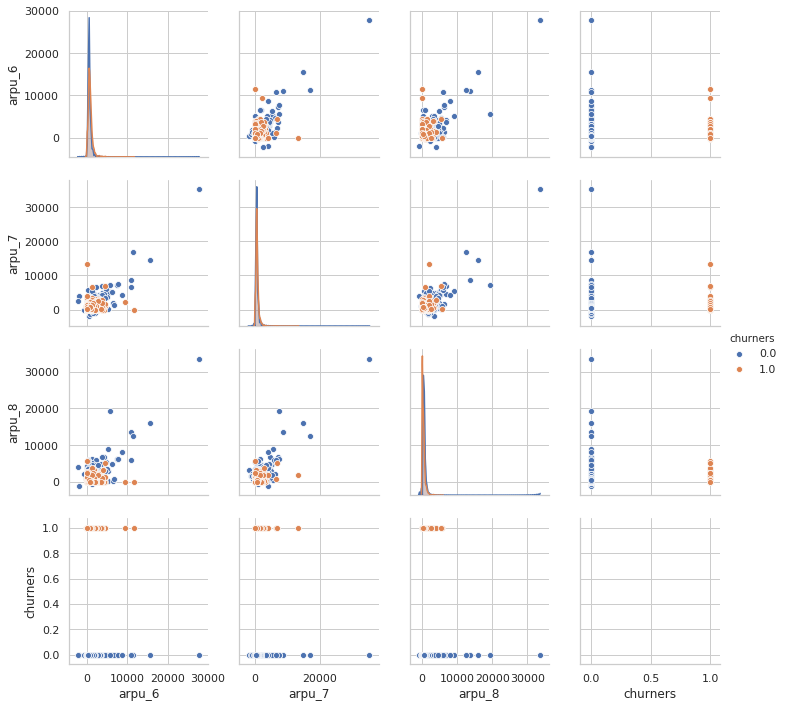

In [111]:
sns.pairplot(data=df[['arpu_6','arpu_7','arpu_8','churners']],hue='churners')

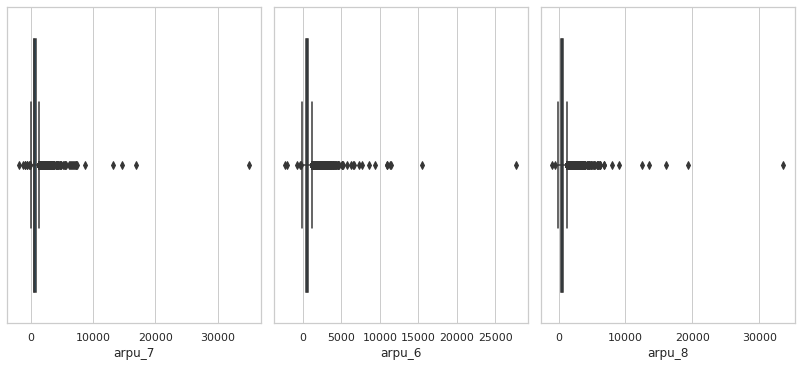

In [112]:
def plot_count(x,fig):
    plt.subplot(4,4,fig)
    sns.boxplot(x=df[x],palette="colorblind")
    
plt.figure(figsize=(15,20))

plot_count('arpu_7', 1)
plot_count('arpu_6', 2)
plot_count('arpu_8', 3)


plt.tight_layout()

Looking at the pair plot and box plots, we can see there are  ouliers in the data and also we can see there are no churners in the outlier category.Hence we can filter to 95 percentile.

In [0]:
Q1 = df.quantile(0.02)
Q3 = df.quantile(0.98)
IQR = Q3 - Q1

idx = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

X_after_outlier= df.loc[idx]

X_after_outlier.drop(X_after_outlier.index[X_after_outlier['arpu_6']<0],inplace=True)
X_after_outlier.drop(X_after_outlier.index[X_after_outlier['arpu_7']<0],inplace=True)
X_after_outlier.drop(X_after_outlier.index[X_after_outlier['arpu_8']<0],inplace=True)

# def plot_count(x,fig):
#     plt.subplot(4,4,fig)
#     sns.boxplot(x=train_cleaned[x],palette="colorblind")
    
# plt.figure(figsize=(15,20))

# plot_count('arpu_7', 1)
# plot_count('arpu_6', 2)
# plot_count('arpu_8', 3)


# plt.tight_layout()

In [205]:
X_after_outlier.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,...,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churners,total_averageTRevnue_generated_by_user
3,7.001204e+09,221.338,251.102,508.054,99.91,54.39,310.98,123.31,109.01,71.68,0.0,54.86,44.38,0.0,28.09,39.04,73.68,34.81,10.61,107.43,83.21,22.46,1.91,0.65,4.91,0.0,0.00,0.00,183.03,118.68,37.99,26.23,14.89,289.58,2.99,1.73,6.53,0.00,0.00,0.00,...,0.0,0.00,0.00,10.0,11.0,18.0,230.0,310.0,601.0,60.0,50.0,50.0,30.0,50.0,50.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2491.0,0.00,0.00,0.00,0.0,0.0,980.494
8,7.001525e+09,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.00,0.00,0.0,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,...,0.0,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,0.0,1008.306
15,7.002070e+09,31.000,510.465,590.643,0.00,246.56,280.31,0.00,839.58,1011.91,0.0,0.00,0.00,0.0,0.88,0.00,0.00,16.13,44.79,0.00,38.99,92.53,0.00,5.13,4.83,0.0,9.78,0.00,0.00,60.26,142.16,0.00,230.43,235.51,0.00,775.66,914.54,0.00,0.00,0.00,...,0.0,2.91,0.61,1.0,13.0,11.0,0.0,686.0,696.0,0.0,110.0,130.0,0.0,110.0,130.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0,0.00,0.00,0.00,0.0,0.0,1132.108
20,7.001028e+09,271.699,421.474,364.251,72.41,86.73,71.18,198.84,225.38,132.51,0.0,0.00,0.00,0.0,0.00,0.00,72.21,83.98,71.18,174.93,148.43,81.94,5.98,22.48,10.08,0.0,0.00,0.00,253.13,254.89,163.21,0.20,2.74,0.00,5.86,21.86,23.18,12.06,29.61,14.33,...,0.0,0.00,0.00,6.0,2.0,3.0,437.0,250.0,477.0,250.0,250.0,250.0,120.0,0.0,97.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3108.0,1.11,0.22,0.00,0.0,0.0,1057.424
21,7.002124e+09,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.00,0.00,0.0,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.00,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,...,0.0,0.00,0.00,22.0,26.0,27.0,600.0,680.0,718.0,50.0,50.0,50.0,30.0,20.0,50.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720.0,0.00,0.00,0.00,0.0,0.0,1749.966


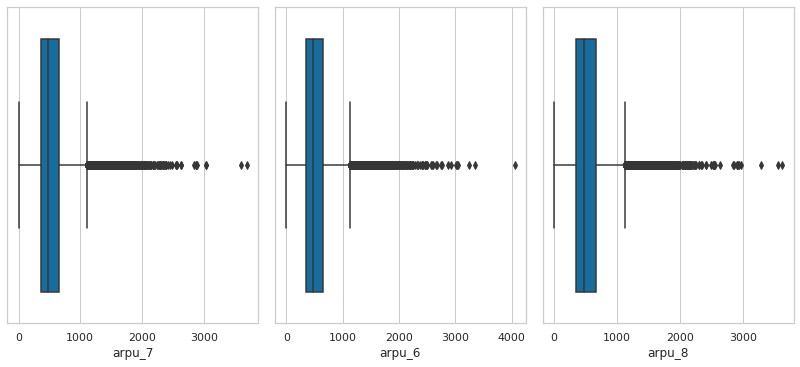

In [206]:
def plot_count(x,fig):
    plt.subplot(4,4,fig)
    sns.boxplot(x=X_after_outlier[x],palette="colorblind")
    
plt.figure(figsize=(15,20))

plot_count('arpu_7', 1)
plot_count('arpu_6', 2)
plot_count('arpu_8', 3)


plt.tight_layout()

Looking at the columns we can see all the ouliers has been removed . Hence we move to further analysis.

In [207]:
X_after_outlier.head(100)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,...,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churners,total_averageTRevnue_generated_by_user
3,7.001204e+09,221.338,251.102,508.054,99.91,54.39,310.98,123.31,109.01,71.68,0.00,54.86,44.38,0.00,28.09,39.04,73.68,34.81,10.61,107.43,83.21,22.46,1.91,0.65,4.91,0.0,0.00,0.00,183.03,118.68,37.99,26.23,14.89,289.58,2.99,1.73,6.53,0.00,0.00,0.00,...,0.00,0.00,0.00,10.0,11.0,18.0,230.0,310.0,601.0,60.0,50.0,50.0,30.0,50.0,50.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2491.0,0.00,0.00,0.00,0.0,0.0,980.494
8,7.001525e+09,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,...,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.00,356.00,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,0.0,1008.306
15,7.002070e+09,31.000,510.465,590.643,0.00,246.56,280.31,0.00,839.58,1011.91,0.00,0.00,0.00,0.00,0.88,0.00,0.00,16.13,44.79,0.00,38.99,92.53,0.00,5.13,4.83,0.0,9.78,0.00,0.00,60.26,142.16,0.00,230.43,235.51,0.00,775.66,914.54,0.00,0.00,0.00,...,0.00,2.91,0.61,1.0,13.0,11.0,0.0,686.0,696.0,0.0,110.0,130.0,0.0,110.0,130.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0,0.00,0.00,0.00,0.0,0.0,1132.108
20,7.001028e+09,271.699,421.474,364.251,72.41,86.73,71.18,198.84,225.38,132.51,0.00,0.00,0.00,0.00,0.00,0.00,72.21,83.98,71.18,174.93,148.43,81.94,5.98,22.48,10.08,0.0,0.00,0.00,253.13,254.89,163.21,0.20,2.74,0.00,5.86,21.86,23.18,12.06,29.61,14.33,...,0.00,0.00,0.00,6.0,2.0,3.0,437.0,250.0,477.0,250.0,250.0,250.0,120.0,0.0,97.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3108.0,1.11,0.22,0.00,0.0,0.0,1057.424
21,7.002124e+09,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.00,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,...,0.00,0.00,0.00,22.0,26.0,27.0,600.0,680.0,718.0,50.0,50.0,50.0,30.0,20.0,50.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720.0,0.00,0.00,0.00,0.0,0.0,1749.966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,7.000352e+09,572.100,490.289,330.390,570.19,706.34,316.93,237.01,128.58,170.48,10.44,0.60,0.00,10.03,14.16,0.00,50.23,34.99,22.91,72.78,62.71,62.34,8.28,0.70,0.08,0.0,0.00,0.45,131.29,98.41,85.34,511.48,657.18,294.01,154.39,60.08,102.94,0.00,0.00,0.00,...,0.18,0.00,0.10,13.0,13.0,5.0,

In [0]:


# Features
X_Data = X_after_outlier.drop(['churners','mobile_number'],axis=1) 
# output y
y = X_after_outlier['churners']

In [209]:
X_after_outlier.shape

(24636, 128)

In [210]:
y.shape


(24636,)

In [230]:
y.value_counts()/len(y.index)*100

0.0    93.972236
1.0     6.027764
Name: churners, dtype: float64

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_Data)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y, train_size=0.75,test_size=0.25,random_state=100)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [272]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [273]:
pca.components_

array([[ 7.75174495e-02,  7.02608195e-02,  7.31416887e-02, ...,
         6.10806835e-02,  2.40391853e-02,  9.40147350e-02],
       [ 1.50781165e-01,  1.88922075e-01,  1.57418318e-01, ...,
        -5.51992030e-02, -2.10280786e-02,  2.10811606e-01],
       [ 1.08527840e-01,  1.31991802e-01,  1.28037198e-01, ...,
         2.26030457e-01,  6.78456599e-02,  1.56535417e-01],
       ...,
       [-0.00000000e+00, -5.24938099e-17,  7.91930159e-17, ...,
        -3.63817040e-17,  4.30573732e-17,  1.21437403e-17],
       [-0.00000000e+00, -3.71868000e-18, -3.74328770e-17, ...,
         5.09487864e-17, -8.37684903e-17, -1.84602476e-17],
       [ 3.47098733e-01,  3.28642576e-01,  3.51255705e-01, ...,
         5.95769094e-17,  8.94466792e-17, -8.05068914e-01]])

In [274]:
pca.explained_variance_ratio_

array([1.17204569e-01, 9.29776295e-02, 5.57402980e-02, 4.56020076e-02,
       3.77308886e-02, 3.60228375e-02, 3.32794970e-02, 2.68812398e-02,
       2.45901637e-02, 2.23318735e-02, 2.13868775e-02, 2.05212264e-02,
       1.90145275e-02, 1.80439929e-02, 1.65891842e-02, 1.58808559e-02,
       1.50123137e-02, 1.39219357e-02, 1.26364969e-02, 1.22864054e-02,
       1.19203273e-02, 1.15687075e-02, 1.12442843e-02, 1.04103465e-02,
       9.61884058e-03, 8.98057209e-03, 8.73950928e-03, 8.64835146e-03,
       8.33004294e-03, 8.11157060e-03, 7.74336424e-03, 7.60679450e-03,
       7.35931589e-03, 7.27225157e-03, 7.12698467e-03, 7.07310324e-03,
       6.92059571e-03, 6.50823652e-03, 6.37275986e-03, 6.34015586e-03,
       6.24916550e-03, 6.08938777e-03, 6.04837750e-03, 5.91141254e-03,
       5.54806531e-03, 5.48698668e-03, 5.32101310e-03, 5.02208726e-03,
       4.95717328e-03, 4.82579117e-03, 4.75837430e-03, 4.64388147e-03,
       4.46819621e-03, 4.35517439e-03, 4.02780203e-03, 3.98274522e-03,
      

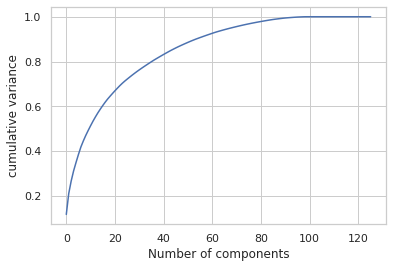

In [275]:
fig = plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('cumulative variance')
plt.show()

In [276]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)


pca_df_train = pca_final.fit_transform(X_train)
pca_df_train.shape

(18477, 40)

In [0]:
pcaData = np.corrcoef(pca_df_train.transpose())

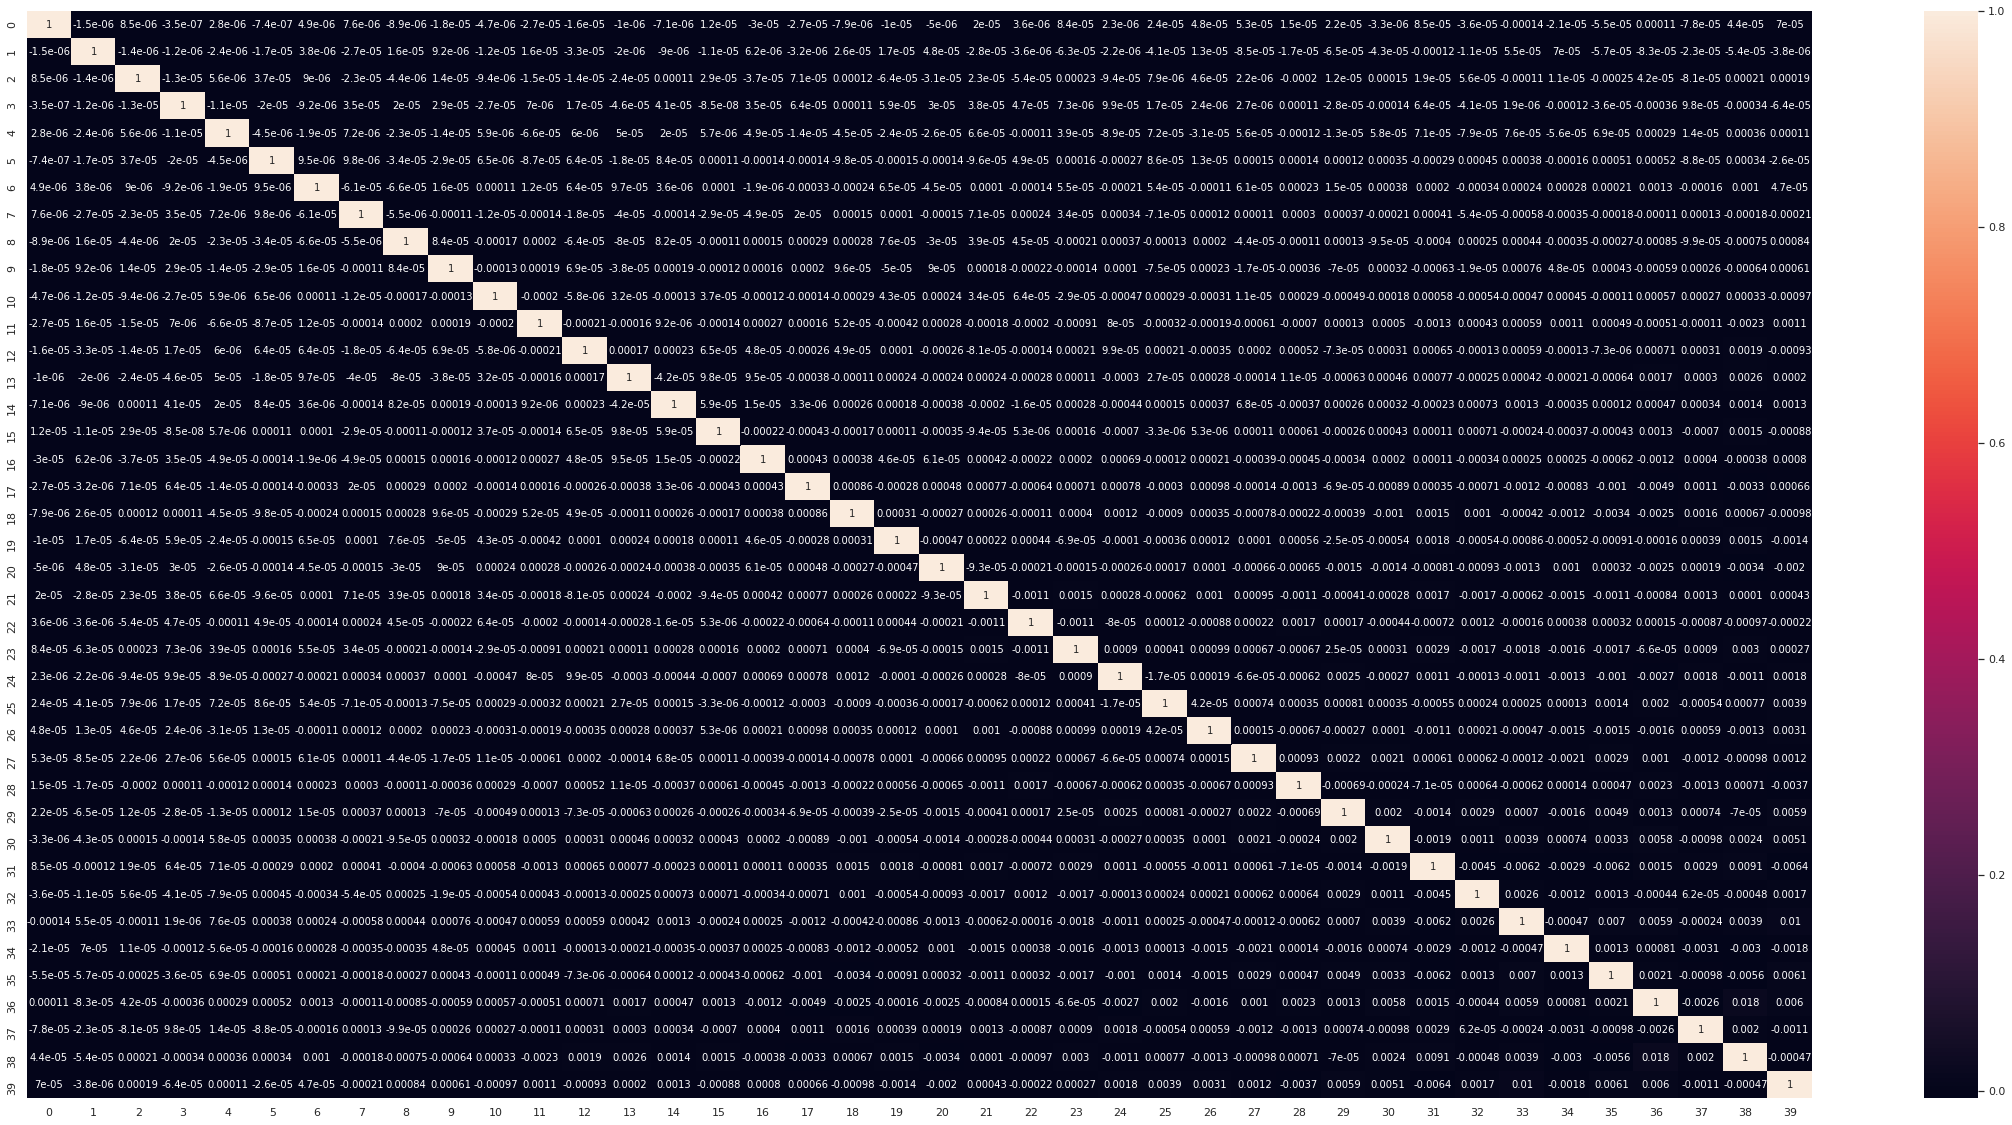

In [278]:
%matplotlib inline
plt.figure(figsize = (40,20))
sns.heatmap(pcaData,annot = True)

In [314]:
pca_df_test = pca_final.transform(X_test)
pca_df_test.shape

(6159, 40)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# fitting logistic regression model with default hyper parameters
lp = LogisticRegression(penalty='l1',C=0.3,class_weight='balanced').fit(pca_df_train,y_train)

In [316]:
yPred = lp.predict(pca_df_test)
print("Accuracy:{0}".format(metrics.accuracy_score(y_test, yPred)))
print("Sensitivity:{0}".format(metrics.recall_score(y_test, yPred)))

Accuracy:0.8079233641824971
Sensitivity:0.7588075880758808


In [0]:
from sklearn.model_selection  import StratifiedKFold
stratefied_Kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=9999)

In [0]:
from sklearn.linear_model import LogisticRegressionCV

lr_searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=stratefied_Kfold
        ,random_state=777
        ,max_iter=100
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=1
        ,verbose = 2
        ,n_jobs = -1
    
    )

In [319]:
lr_searchCV.fit(pca_df_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.4s finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=4, random_state=9999, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='warn',
                     n_jobs=-1, penalty='l2', random_state=777, refit=True,
                     scoring='roc_auc', solver='newton-cg', tol=1, verbose=2)

In [320]:
print('lambda=',lr_searchCV.C_)

lambda= [1.]


In [321]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
preds_L2Search = lr_searchCV.predict(pca_df_test)
preds_L2Search_probs = lr_searchCV.predict_proba(pca_df_test)[:,1]

yPred = lr_searchCV.predict(pca_df_test)
print("Accuracy:{0}".format(metrics.accuracy_score(y_test, yPred)))
print("Sensitivity:{0}".format(metrics.recall_score(y_test, yPred)))


Accuracy:0.9441467770742004
Sensitivity:0.2005420054200542


In [322]:
confusion_matrix(y_test, preds_L2Search)


array([[5741,   49],
       [ 295,   74]])

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

y_pred=rf_model.predict(X_test)

In [324]:
print("Accuracy:{0}".format(metrics.accuracy_score(y_test, yPred)))
print("Sensitivity:{0}".format(metrics.recall_score(y_test, yPred)))

Accuracy:0.9441467770742004
Sensitivity:0.2005420054200542


In [325]:
pd.concat((pd.DataFrame(X_Data.columns,columns=['Variables']),pd.DataFrame(rf_model.feature_importances_,columns=['Importance'])),axis=1).sort_values(by='Importance',ascending =False)

,Variables,Importance
56,loc_ic_t2t_mou_8,0.054429
80,total_ic_mou_8,0.044795
59,loc_ic_t2m_mou_8,0.041366
95,total_rech_amt_8,0.035625
65,loc_ic_mou_8,0.034329
98,max_rech_amt_8,0.027983
29,loc_og_mou_8,0.025643
11,roam_ic_mou_8,0.025283
2,arpu_8,0.023908
14,roam_og_mou_8,0.021190


In [0]:
from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

In [0]:
RFC_Trained= RFC_balanced.fit(pca_df_train,y_train)

In [328]:
preds_RFC=RFC_Trained.predict(pca_df_test)
preds_probs_RFC=RFC_Trained.predict_proba(pca_df_test)[:,1]

print(classification_report(y_test, preds_RFC))
yPred = RFC_Trained.predict(pca_df_test)
print("Accuracy:{0}".format(metrics.accuracy_score(y_test, yPred)))
print("Sensitivity:{0}".format(metrics.recall_score(y_test, yPred)))


              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      5790
         1.0       0.23      0.67      0.34       369

    accuracy                           0.84      6159
   macro avg       0.60      0.76      0.62      6159
weighted avg       0.93      0.84      0.88      6159

Accuracy:0.8425069004708556
Sensitivity:0.6720867208672087


In [333]:
pd.concat((pd.DataFrame(X_Data.columns,columns=['Variables']),pd.DataFrame(RFC_Trained.feature_importances_,columns=['Importance'])),axis=1).sort_values(by='Importance',ascending =False)

,Variables,Importance
53,total_og_mou_8,0.092085
56,loc_ic_t2t_mou_8,0.091885
80,total_ic_mou_8,0.078638
29,loc_og_mou_8,0.076990
65,loc_ic_mou_8,0.076267
14,roam_og_mou_8,0.074366
20,loc_og_t2m_mou_8,0.067274
2,arpu_8,0.060603
101,last_day_rch_amt_8,0.044857
77,std_ic_mou_8,0.035330


Lets check with how random forest performs with original instead of pca data

In [0]:
RFC_Trained= RFC_balanced.fit(X_train,y_train)

In [331]:


yPred = RFC_Trained.predict(X_test)
print("Accuracy:{0}".format(metrics.accuracy_score(y_test, yPred)))
print("Sensitivity:{0}".format(metrics.recall_score(y_test, yPred)))


Accuracy:0.8826108134437408
Sensitivity:0.7588075880758808


Looks random forest is giving better results with original data with accuracy of 88.26 and sensitivity of 0.75

In [332]:
pd.concat((pd.DataFrame(X_Data.columns,columns=['Variables']),pd.DataFrame(RFC_Trained.feature_importances_,columns=['Importance'])),axis=1).sort_values(by='Importance',ascending =False)

,Variables,Importance
53,total_og_mou_8,0.092085
56,loc_ic_t2t_mou_8,0.091885
80,total_ic_mou_8,0.078638
29,loc_og_mou_8,0.076990
65,loc_ic_mou_8,0.076267
14,roam_og_mou_8,0.074366
20,loc_og_t2m_mou_8,0.067274
2,arpu_8,0.060603
101,last_day_rch_amt_8,0.044857
77,std_ic_mou_8,0.035330


###Observations and Recommendations.

Calls like local incoming and outgoing  and roaming are the major factors in deciding whether the customer will churn or not.

So we can focus on customers who are paying too much on calls and offer them discounted call rates or we can also try charging fixed amount for unlimited calls such that it benifits both customer and company

Other Factor that is contributing to the churns are the usage of data. The volume of data usage and the cost incurring can also be factor that will make customer to churn.

Try to hold on  to the high value customers by giving better disount than the competitors.

give additional data on data pack recharges (for 7th month)